<a href="https://colab.research.google.com/github/lingbofang66/BA_Project/blob/master/Copy_of_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.models import LdaModel
from gensim import models, corpora, similarities
import re
from nltk.stem.porter import PorterStemmer
import time
from nltk import FreqDist
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [ ]:
url_1 = "http://gutenberg.ca/ebooks/hemingwaye-sunalsorises/hemingwaye-sunalsorises-00-h.html"
file_1 = urllib.request.urlopen(url_1)
url_2 = "http://gutenberg.ca/ebooks/hemingwaye-menwithoutwomen/hemingwaye-menwithoutwomen-00-h.html"
file_2 = urllib.request.urlopen(url_2)
url_3 = "http://gutenberg.ca/ebooks/hemingwaye-winnertakenothing/hemingwaye-winnertakenothing-00-h.html"
file_3 = urllib.request.urlopen(url_3)
url_4 = "http://gutenberg.ca/ebooks/hemingwaye-greenhillsofafrica/hemingwaye-greenhillsofafrica-00-h.html"
file_4 = urllib.request.urlopen(url_4)
url_5 = "http://gutenberg.ca/ebooks/hemingwaye-acrosstheriver/hemingwaye-acrosstheriver-00-h.html"
file_5 = urllib.request.urlopen(url_5)
url_6 = "http://gutenberg.ca/ebooks/hemingwaye-oldmanandthesea/hemingwaye-oldmanandthesea-00-h.html"
file_6 = urllib.request.urlopen(url_6)

files = [file_1, file_2, file_3, file_4,file_5,file_6]

In [ ]:
ids = []
texts = []
id = 0
for file in files:
  doc_len = 0
  document_text = ""
  for line in file:
    formatted_string = str(line.strip())[1:]
    if len(formatted_string) < 20:
      continue
    document_text = document_text + formatted_string  
    doc_len = doc_len + 1
    if doc_len == 50:
      ids.append(id)
      texts.append(document_text)
      document_text = ""
      doc_len = 0

  id = id + 1

df = pd.DataFrame({'id': ids, 'text':texts})



In [ ]:
df

,id,text,book_text_processed
0,0,"'<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 ...","<doctype html public ""-//w3c//dtd html 401 tra..."
1,0,"'<a href=""#chapter104"">CHAPTER 4</a>''<h4 id=""...","<a href=""#chapter104"">chapter 4</a><h4 id=""toc..."
2,0,'think that I am very much impressed by that a...,think that i am very much impressed by that as...
3,0,"'had to give it up.''By that time, though, he ...",had to give it upby that time though he had ot...
4,0,"'""Good, that will be fine.""''""Well, I\'ll see ...","""good that will be fine""""well i\ll see you to-..."
...,...,...,...
581,5,'The old man saw the brown fins coming along t...,the old man saw the brown fins coming along th...
582,5,'He liked to think of the fish and what he cou...,he liked to think of the fish and what he coul...
583,5,'He jerked the tiller free from the rudder and...,he jerked the tiller free from the rudder and ...
584,5,"""standing up well behind the skiff's stern. H...","""standing up well behind the skiffs stern he ..."


In [ ]:
year_df = pd.DataFrame({'id':[0,1,2,3,4,5], 'year':[1926, 1927,1933,1935,1950,1952]})
year_df.head()

,id,year
0,0,1926
1,1,1927
2,2,1933
3,3,1935
4,4,1950


In [ ]:
import re
# Remove punctuation
df['book_text_processed'] = df['text'].map(lambda x: re.sub('[\',.!?*]', '', str(x)))
# Convert the titles to lowercase
df['book_text_processed'] = df['book_text_processed'].replace(r'\n',' ', regex=True) 
df['book_text_processed'] = df['book_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['book_text_processed'] = df['book_text_processed'].apply(lambda x: x.strip())
df.head()



,id,text,book_text_processed
0,0,"'<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 ...","<doctype html public ""-//w3c//dtd html 401 tra..."
1,0,"'<a href=""#chapter104"">CHAPTER 4</a>''<h4 id=""...","<a href=""#chapter104"">chapter 4</a><h4 id=""toc..."
2,0,'think that I am very much impressed by that a...,think that i am very much impressed by that as...
3,0,"'had to give it up.''By that time, though, he ...",had to give it upby that time though he had ot...
4,0,"'""Good, that will be fine.""''""Well, I\'ll see ...","""good that will be fine""""well i\ll see you to-..."


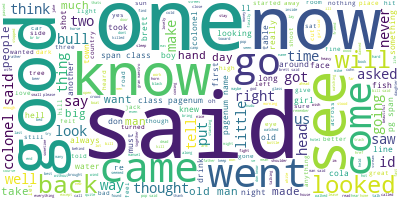

In [ ]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['book_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


# K means



In [ ]:
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens] #ending ended -> end
    return words

count_vectorizer = CountVectorizer(tokenizer=textblob_tokenizer)
count_data = count_vectorizer.fit_transform(df['book_text_processed'])
pd.DataFrame(count_data.toarray(), columns=count_vectorizer.get_feature_names())


,0,1,10,100,100678,101,102,103,1030,104,105,106,107,108,1081thi,109,11,11//en,110,1100,111,112,113,114,115,116,117,118,118of,119,12,120,121,122,123,124,125,1253thi,1257thi,126,...,yourun,yourwif,yousaw,youse,yousmok,yousom,yousometh,youstop,yousuddenli,youth,youthat,youthink,youththeir,youto,youv,youviol,youwant,youwelcom,youwer,youwhat,youwil,youwould,yowlercamp-follow,yucatan,yuhh,yuletid,zebra,zeiss,zelli,zenzon,zigzag,zinc,zipper,zizi,zonda,zurito,zuritobehind,zuritomanuel,zuritopul,zuritoth
0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
582,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
584,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())
df['book_text_processed'] = df['book_text_processed'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words ))
#df['book_text_processed'] = df['book_text_processed'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha()))


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
df

,id,text,book_text_processed
0,0,"'<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 ...",public transitional en meta content type conte...
1,0,"'<a href=""#chapter104"">CHAPTER 4</a>''<h4 id=""...",a chapter a id a chapter a id a chapter a id a...
2,0,'think that I am very much impressed by that a...,think that i am very much by that as a boxing ...
3,0,"'had to give it up.''By that time, though, he ...",had to give it that time though he had other t...
4,0,"'""Good, that will be fine.""''""Well, I\'ll see ...",good that will be fine well i see you to morro...
...,...,...,...
581,5,'The old man saw the brown fins coming along t...,the old man saw the brown coming along the wid...
582,5,'He liked to think of the fish and what he cou...,he to think of the fish and what he could do t...
583,5,'He jerked the tiller free from the rudder and...,he the tiller free from the rudder and beat an...
584,5,"""standing up well behind the skiff's stern. H...",standing up well behind the stern he saw the w...


In [ ]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

count_vectorizer = CountVectorizer(tokenizer=textblob_tokenizer)
count_data = count_vectorizer.fit_transform(df['book_text_processed'])
pd.DataFrame(count_data.toarray(), columns=count_vectorizer.get_feature_names())


,a,aback,abandon,abdomen,abid,abil,abl,abli,abnorm,aboard,about,abov,abox,abruptli,absenc,absent,absinth,absolut,absorb,absorpt,abstractli,abund,abus,abut,academi,accent,accept,accid,accident,acclam,accompani,accomplish,accord,accordingli,accordion,account,accur,accuraci,accus,accustom,...,wrapper,wrath,wreath,wreck,wrench,wretch,wrinkl,wrist,write,writer,written,wrong,wrote,x,y,ya,yacht,yan,yard,ye,yeah,year,yell,yellow,yellowish,yesterday,yet,york,you,youd,young,younger,your,yourself,youth,youv,yuletid,zebra,zigzag,zinc
0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,2,0,0,0,0,0,0,0
1,41,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,16,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
4,12,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,9,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0
582,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0
583,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0
584,8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0


## Term frequency is given by: 
## Term Frequency Formula 
$tf(w,d) = log(1 + f(w,d))$ 

##Here f(w,d) is the frequency of word w in document d.
## Second step is to calculate the inverse term frequency.
## Inverse Document Frequency Formula
$idf(w, D) = log(\frac{N}{f(w,D)})$

## With N documents in the dataset and f(w, D) the frequency of word w in the whole dataset, this number will be lower with more appearances of the word in the whole dataset.
## Final step is to compute the TF-IDF score by the following formula:

$TF-IDF = tf*idf$

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      norm='l2', 
                      use_idf=False)
matrix = vec.fit_transform(df['book_text_processed'])
lf = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
lf


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

,aback,abandon,abdomen,abid,abil,abl,abli,abnorm,aboard,abov,abox,abruptli,absenc,absent,absinth,absolut,absorb,absorpt,abstractli,abund,abus,abut,academi,accent,accept,accid,accident,acclam,accompani,accomplish,accord,accordingli,accordion,account,accur,accuraci,accus,accustom,ace,acetylen,...,worthless,wouldnt,wound,wrap,wrapper,wrath,wreath,wreck,wrench,wretch,wrinkl,wrist,write,writer,written,wrong,wrote,x,y,ya,yacht,yan,yard,ye,yeah,year,yell,yellow,yellowish,yesterday,york,youd,young,younger,youth,youv,yuletid,zebra,zigzag,zinc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.056254,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.038662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035760,0.0,0.0,0.0,0.000000,0.035760,0.0,0.03576,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045038,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.045038,0.0,0.0,0.0,0.045038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045038,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.086468,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.039467,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.047298,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      norm='l2', 
                      use_idf=True)
matrix = vec.fit_transform(df['book_text_processed'])
lf = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
lf

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

,aback,abandon,abdomen,abid,abil,abl,abli,abnorm,aboard,abov,abox,abruptli,absenc,absent,absinth,absolut,absorb,absorpt,abstractli,abund,abus,abut,academi,accent,accept,accid,accident,acclam,accompani,accomplish,accord,accordingli,accordion,account,accur,accuraci,accus,accustom,ace,acetylen,...,worthless,wouldnt,wound,wrap,wrapper,wrath,wreath,wreck,wrench,wretch,wrinkl,wrist,write,writer,written,wrong,wrote,x,y,ya,yacht,yan,yard,ye,yeah,year,yell,yellow,yellowish,yesterday,york,youd,young,younger,youth,youv,yuletid,zebra,zigzag,zinc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.062514,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.068758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045649,0.0,0.0,0.0,0.000000,0.054023,0.0,0.042665,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113867,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.056193,0.0,0.0,0.0,0.066095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060435,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.136228,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.079715,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.058003,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0

In [ ]:
from sklearn.cluster import KMeans
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(matrix) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      


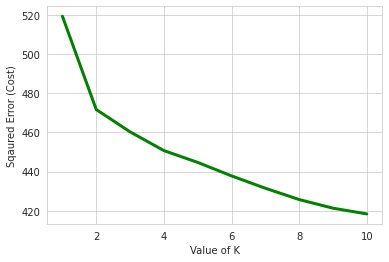

In [ ]:
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 


In [ ]:
from sklearn.cluster import KMeans

number_of_clusters=6
km = KMeans(n_clusters=number_of_clusters)
# Normally people fit the matrix
km.fit(matrix)
# But you could fit the idf_df instead
km.fit


<bound method KMeans.fit of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [ ]:
df['labels'] = km.labels_

In [ ]:
zf = (df.groupby(['id','labels']).size()/df.groupby(['id']).size()).reset_index(name ='accuracy')
zf.groupby('id')['accuracy'].max().reset_index(name='accuracy')


,id,accuracy
0,0,1.000000
1,1,1.000000
2,2,1.000000
3,3,0.825503
4,4,1.000000
5,5,1.000000


In [ ]:
from sklearn.decomposition import TruncatedSVD
sklearn_svd = TruncatedSVD(n_components = 2)
Y_sklearn = sklearn_svd.fit_transform(matrix)
df['Z_1'] = Y_sklearn[:,0]
df['Z_2'] = Y_sklearn[:,1]


In [ ]:
from sklearn.cluster import KMeans

number_of_clusters=6
svd_km = KMeans(n_clusters=number_of_clusters)
svd_km.fit(Y_sklearn)
df['svd_labels'] = svd_km.labels_


In [ ]:
zf = (df.groupby(['id','svd_labels']).size()/df.groupby(['id']).size()).reset_index(name ='accuracy')
zf.groupby('id')['accuracy'].max().reset_index(name='accuracy')


,id,accuracy
0,0,0.725806
1,1,0.671053
2,2,0.628571
3,3,0.402685
4,4,0.370968
5,5,0.651163


In [ ]:
zf.sort_values('accuracy',inplace=True, ascending=False)
zf

,id,svd_labels,accuracy
0,0,0,0.725806
3,1,2,0.671053
16,5,2,0.651163
5,2,2,0.628571
9,3,4,0.402685
4,2,0,0.371429
11,4,0,0.370968
15,5,0,0.348837
14,4,5,0.330645
2,1,0,0.328947


In [ ]:
id_map = {}
hash_done = {}
for _,row in zf.iterrows():
  if row['id'] in id_map:
    continue
  else:
    id_map[row['id']] = row['svd_labels']  

In [ ]:
map_df = pd.DataFrame({'id':map(int, list(id_map.keys())),'transformed_id':map(int,list(id_map.values()))})
map_df

,id,transformed_id
0,0,0
1,1,2
2,5,2
3,2,2
4,3,4
5,4,0


In [ ]:
plot_df = pd.merge(df,map_df,on='id',how='inner')
plot_df

,id,text,book_text_processed,labels,Z_1,Z_2,svd_labels,transformed_id
0,0,"'<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.01 ...",public transitional en meta content type conte...,0,0.057979,-0.045961,2,0
1,0,"'<a href=""#chapter104"">CHAPTER 4</a>''<h4 id=""...",a chapter a id a chapter a id a chapter a id a...,0,0.050888,-0.027678,2,0
2,0,'think that I am very much impressed by that a...,think that i am very much by that as a boxing ...,0,0.143989,-0.203545,2,0
3,0,"'had to give it up.''By that time, though, he ...",had to give it that time though he had other t...,0,0.218773,-0.318877,0,0
4,0,"'""Good, that will be fine.""''""Well, I\'ll see ...",good that will be fine well i see you to morro...,0,0.189578,-0.265012,0,0
...,...,...,...,...,...,...,...,...
581,5,'The old man saw the brown fins coming along t...,the old man saw the brown coming along the wid...,0,0.168554,-0.222297,2,2
582,5,'He liked to think of the fish and what he cou...,he to think of the fish and what he could do t...,0,0.167926,-0.240704,2,2
583,5,'He jerked the tiller free from the rudder and...,he the tiller free from the rudder and beat an...,0,0.158697,-0.214985,2,2
584,5,"""standing up well behind the skiff's stern. H...",standing up well behind the stern he saw the w...,0,0.187302,-0.267739,0,2


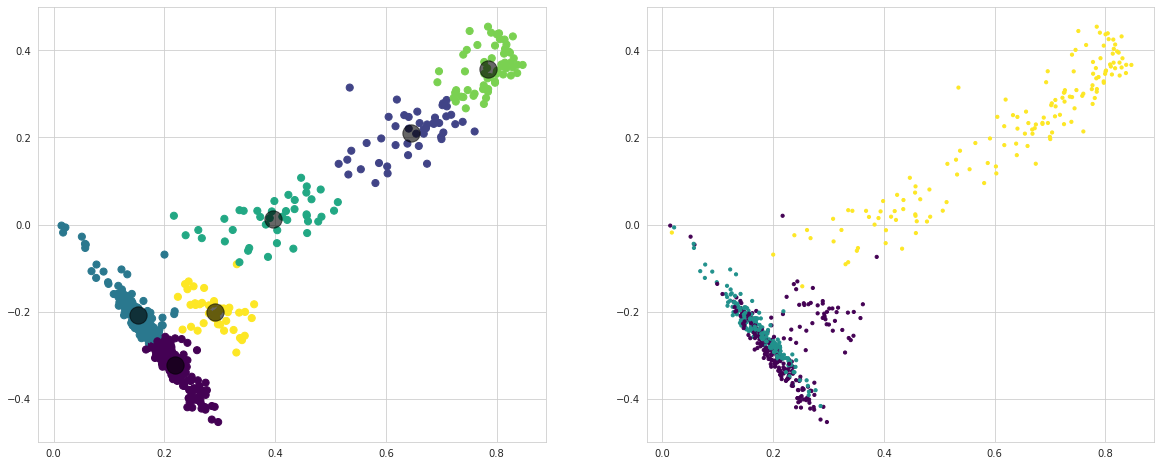

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

axes[0].scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=plot_df['svd_labels'], s=50, cmap='viridis')

centers = svd_km.cluster_centers_
axes[0].scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

axes[1].scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=plot_df['transformed_id'], s=10, cmap='viridis')



In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 2
number_words = 100
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
the and p a of he to i wa in it hi we on had that him with as were said out up not they but span there all then at you for down one man bull them old could back id from now m s into pop came class go over when name where be no see fish get head come cola went would my is so veri through thi by thought did water good have us saw if like hand two too me big again watch been off look long time side or made left what their sun

Topic #1:
the i and you to a it said he in of wa that they is t not we on have at with me all s had for do be him go but what she were hi there know as colonel one no up out good my them like about are her can would get from don when so thi veri come if will then did think your time just or now been down who want ani brett went right some could well how never see too got say an tell back look love bill came dont ye girl two man


In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 9.4MB/s 
     |████████████████████████████████| 552kB 42.1MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=976072e711ff35415953ec97924c6d55f377f7c9c5f28a8869a40f7f4b4349aa
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=a673d19a7689e800a4e6f672aeda015837e400a08a5f27bda2cd9528b74752cc
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
#if 1 == 1:
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
#with open(LDAvis_data_filepath, 'w') as f:
#  pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath) as f:
#    LDAvis_prepared = pickle.load(f)


In [ ]:
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')


In [ ]:
from google.colab import files
files.download('ldavis_prepared_2.html') 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>